# Client API Demo

This notebook is designed to demonstrate how easy it is to use the SAP AI Business Services - Document Information Extraction service. In this demo, we create a new client to then upload enrichment data and use the service to extract data from example invoices.

## Fetch python module

This notebook requires the python package containing the client.

In [7]:
# !pip install ...

## Settings

The settings require a valid service key for the Document Information Extraction service on SAP Cloud Plattform.

The keys in the service key needed here are named exactly as the variables, specifically:

- url: The URL of the service deployment provided in the outermost hierachy of the service key json file
- uaa_url: The URL of the UAA server used for authentication provided in the uaa of the service key json file
- uaa_clientid: The clientid used for authentication to the UAA server provided in the uaa of the service key json file
- uaa_clientsecret: The clientsecret used for authentication to the UAA server provided in the uaa of the service key json file

In [26]:
service_key = {
  "url": "https://aiservices-trial-dox.cfapps.eu10.hana.ondemand.com",
  "uaa": {
    "tenantmode": "shared",
    "sburl": "https://internal-xsuaa.authentication.eu10.hana.ondemand.com",
    "subaccountid": "11939619-af01-4a8c-bda5-8e5435280791",
    "clientid": "sb-15d327e4-af3a-471e-a5fd-05b51fb3a9b8!b76941|na-9e50499f-78dd-40ca-ad8d-60acf02cff8b!b30417",
    "xsappname": "15d327e4-af3a-471e-a5fd-05b51fb3a9b8!b76941|na-9e50499f-78dd-40ca-ad8d-60acf02cff8b!b30417",
    "clientsecret": "e6TnWWQC5yj2NGi7mE/QEslNTQM=",
    "url": "https://bee89f2ctrial.authentication.eu10.hana.ondemand.com",
    "uaadomain": "authentication.eu10.hana.ondemand.com",
    "verificationkey": "-----BEGIN PUBLIC KEY-----MIIBIjANBgkqhkiG9w0BAQEFAAOCAQ8AMIIBCgKCAQEAt4W3fOLGXUJn7n5lDqidj63AdwMP/MGR9Y7Jv6ZmSYAgvZPD2usA1l5vlDBfCbFS+2SDVCZfHTkspIpXv5tKQvVQ9V3NFQsJt+xReIb+5Rk3RSQFv7+B7OkhmZjCYJvBIftF2mInM16GJ1FgsK2lJt1rH2GfOna7inenbktiI5/gBYiXq/68lP/XgIeRf3hOaigasm3zsr4EEd+qxlzCB0ryK8EvRYXqYzIELLkRiZtg+iCz59RZGZnUZ29aTfF+4mZbzh+R/cAHL1uNmg5jOIr9fuZfQ3l8vYppGaay1i1A6vzNJU/QDMd1619ss6qg1MkPKyeHXZtHriOKGqLl8wIDAQAB-----END PUBLIC KEY-----",
    "apiurl": "https://api.authentication.eu10.hana.ondemand.com",
    "identityzone": "bee89f2ctrial",
    "identityzoneid": "11939619-af01-4a8c-bda5-8e5435280791",
    "tenantid": "11939619-af01-4a8c-bda5-8e5435280791",
    "zoneid": "11939619-af01-4a8c-bda5-8e5435280791"
  },
  "swagger": "/document-information-extraction/v1/"
}
url = service_key['url'] + service_key['swagger'] #'https://aiservices-trial-dox.cfapps.eu10.hana.ondemand.com/document-information-extraction/v1'
client_id = service_key['uaa']['clientid']
client_secret = service_key['uaa']['clientsecret']
uaa_url = service_key['uaa']['url']

## Initialize Demo

In [27]:
# Import DOX client library
import sys
sys.path.insert(1,'../../')
from client_library.api_client import DoxApiClient
import json

In [28]:
# Instantiate object used to communicate with DOX REST API
api_client = DoxApiClient(url, client_id, client_secret, uaa_url)

## Display access token

In [29]:
# Token can be used to interact with e.g. swagger UI to explore DOX API
print(api_client.session.token)
print(f"\nYou can use this token to Authorize here and explore the API via Swagger UI: \n{url}")

{'access_token': 'eyJhbGciOiJSUzI1NiIsImprdSI6Imh0dHBzOi8vYmVlODlmMmN0cmlhbC5hdXRoZW50aWNhdGlvbi5ldTEwLmhhbmEub25kZW1hbmQuY29tL3Rva2VuX2tleXMiLCJraWQiOiJkZWZhdWx0LWp3dC1rZXktNzcwMTI5NjY1IiwidHlwIjoiSldUIn0.eyJqdGkiOiI0ZjViMWZmNmVhNGQ0MmVhOTUzNmZkNGQ2ODg0YzM0MSIsImV4dF9hdHRyIjp7ImVuaGFuY2VyIjoiWFNVQUEiLCJzdWJhY2NvdW50aWQiOiIxMTkzOTYxOS1hZjAxLTRhOGMtYmRhNS04ZTU0MzUyODA3OTEiLCJ6ZG4iOiJiZWU4OWYyY3RyaWFsIiwic2VydmljZWluc3RhbmNlaWQiOiIxNWQzMjdlNC1hZjNhLTQ3MWUtYTVmZC0wNWI1MWZiM2E5YjgifSwic3ViIjoic2ItMTVkMzI3ZTQtYWYzYS00NzFlLWE1ZmQtMDViNTFmYjNhOWI4IWI3Njk0MXxuYS05ZTUwNDk5Zi03OGRkLTQwY2EtYWQ4ZC02MGFjZjAyY2ZmOGIhYjMwNDE3IiwiYXV0aG9yaXRpZXMiOlsidWFhLnJlc291cmNlIiwibmEtOWU1MDQ5OWYtNzhkZC00MGNhLWFkOGQtNjBhY2YwMmNmZjhiIWIzMDQxNy50ZWNobmljYWxzY29wZSJdLCJzY29wZSI6WyJ1YWEucmVzb3VyY2UiLCJuYS05ZTUwNDk5Zi03OGRkLTQwY2EtYWQ4ZC02MGFjZjAyY2ZmOGIhYjMwNDE3LnRlY2huaWNhbHNjb3BlIl0sImNsaWVudF9pZCI6InNiLTE1ZDMyN2U0LWFmM2EtNDcxZS1hNWZkLTA1YjUxZmIzYTliOCFiNzY5NDF8bmEtOWU1MDQ5OWYtNzhkZC00MGNhLWFkOGQtNjBhY2YwMmNmZjhiIW

## See list of document fields you can extract

In [30]:
# Get the fields and document types that can be used
api_client.get_capabilities()

{'extraction': {'headerFields': [{'name': 'barcode',
    'type': 'string',
    'category': 'details',
    'supportedDocumentTypes': ['invoice']},
   {'name': 'documentNumber',
    'type': 'string',
    'category': 'document',
    'supportedDocumentTypes': ['invoice', 'paymentAdvice']},
   {'name': 'taxId',
    'type': 'string',
    'category': 'amounts',
    'supportedDocumentTypes': ['invoice']},
   {'name': 'taxName',
    'type': 'string',
    'category': 'amounts',
    'supportedDocumentTypes': ['invoice']},
   {'name': 'purchaseOrderNumber',
    'type': 'string',
    'category': 'details',
    'supportedDocumentTypes': ['invoice']},
   {'name': 'shippingAmount',
    'type': 'number',
    'category': 'amounts',
    'supportedDocumentTypes': ['invoice']},
   {'name': 'netAmount',
    'type': 'number',
    'category': 'amounts',
    'supportedDocumentTypes': ['invoice']},
   {'name': 'grossAmount',
    'type': 'number',
    'category': 'amounts',
    'supportedDocumentTypes': ['invoic

# Create a Client

To use Document Information Extraction, you need to create a client. This client is used to distinguish and separate data.

In [5]:
# Create a new client with the id 'c_00' and name 'Client 00'
api_client.create_client(client_id='c_00', client_name='Client 00')

{'inserted': 1, 'modified': 0}

In [31]:
# Check if the client is created
api_client.get_clients()

[{'clientId': 'default', 'clientName': 'Default'}]

## Upload enrichment data records

You can add your own master data records to the database to enrich the information extracted from documents.

In [32]:
# Upload employee data
employee_data = [
        {
            "id":"E0001",
            "company_code":"0000",
            "email":"",
            "first_name":"Linda",
            "middle_name":"",
            "last_name":"Owens"
        },
        {
            "id":"E0002",
            "company_code":"0000",
            "email":"",
            "first_name":"Lin",
            "middle_name":"",
            "last_name":"Owens"
        }
    ]
api_client.upload_masterdata(client_id='default', data_type='employee', dox_data=employee_data)

{'value': {'id': '3b692498-46ea-4bb3-b17a-a00aac93be95',
  'status': 'SUCCESS',
  'processedTime': '0:00:00.042561',
  'refreshedAt': None}}

In [33]:
# Check the uploaded employee record with id 'E0001'
employee_result = api_client.get_masterdata(client_id='default',data_type='employee', 
                                            data_id='E0001')
print(employee_result[0].to_json())

{'id': 'E0001', 'system': 'DEFAULT', 'companyCode': '0000', 'email': '', 'firstName': None, 'middleName': None, 'lastName': None}


In [34]:
# Upload businessEntity
business_entity_data = [
        {
            "id":"BE0001",
            "data_system":"",
            "company_code":"",
            "name":"Sliced Invoices",
            "address1":"123 Somewhere Street Your AZ 12345 123 Somewhere St Melbourne, VIC 3000",
            "address2":"",
            "city":"",
            "country_code":"",
            "postal_code":"",
            "state":"",
            "email":"",
            "phone":"",
            "bank_account":"",
            "account_number":"",
            "tax_id":""
        },
        {
            "id":"BE0002",
            "data_system":"",
            "company_code":"",
            "name":"Sliced",
            "address1":"123 Somewhere Street Your AZ 12345 123 Somewhere St Melbourne, VIC 3000",
            "address2":"",
            "city":"",
            "country_code":"",
            "postal_code":"",
            "state":"",
            "email":"",
            "phone":"",
            "bank_account":"",
            "account_number":"",
            "tax_id":""
        }
    ]
api_client.upload_masterdata(client_id='default', data_type='businessEntity', 
                             dox_data=business_entity_data)

{'value': {'id': '807a0ea1-0723-4821-bcdb-79084a7cee13',
  'status': 'SUCCESS',
  'processedTime': '0:00:00.040156',
  'refreshedAt': None}}

In [35]:
# Check the uploaded businessEntity record with id 'BE0001'
business_entity_result = api_client.get_masterdata(client_id='default',data_type='businessEntity', 
                                                   data_id='BE0001')
print(business_entity_result[0].to_json())

{'id': 'BE0001', 'system': 'DEFAULT', 'companyCode': '0000', 'name': 'Sliced Invoices', 'address1': '123 Somewhere Street Your AZ 12345 123 Somewhere St Melbourne, VIC 3000', 'address2': '', 'city': '', 'countryCode': None, 'postalCode': None, 'state': '', 'email': '', 'phone': '', 'bankAccount': None, 'accountNumber': None, 'taxId': None}


## Upload a document and retrieve the extracted result

In [36]:
# Specify the fields that should be extracted
header_fields = [
         "documentNumber",
         "taxId",
         "purchaseOrderNumber",
         "shippingAmount",
         "netAmount",
         "senderAddress",
         "senderName",
         "grossAmount",
         "currencyCode",
         "receiverContact",
         "documentDate",
         "taxAmount",
         "taxRate",
         "receiverName",
         "receiverAddress"
    ]
line_item_fields = [
         "description",
         "netAmount",
         "quantity",
         "unitPrice",
         "materialNumber"
    ]

# Extract information from invoice
document_result = api_client.upload_document('sample-invoice-1.pdf', 
                                             client_id='default', 
                                             document_type='invoice', 
                                             header_fields=header_fields, 
                                             line_item_fields=line_item_fields)

In [37]:
# Check the extracted data
extracted_result = document_result.json_result
print(json.dumps(extracted_result, indent=2))

{
  "status": "DONE",
  "id": "21947ab2-5308-41f6-81fc-7e85e74d427d",
  "fileName": "sample-invoice-1.pdf",
  "documentType": "invoice",
  "created": "2021-02-12T09:45:13.002873+00:00",
  "finished": "2021-02-12T09:45:29.919510+00:00",
  "country": "XX",
  "extraction": {
    "headerFields": [
      {
        "name": "documentDate",
        "category": "document",
        "value": "2016-01-25",
        "type": "date",
        "page": 1,
        "confidence": 0.986219305545092,
        "coordinates": {
          "x": 0.758901758901759,
          "y": 0.174097664543524,
          "w": 0.113685113685114,
          "h": 0.00970579314528361
        }
      },
      {
        "name": "taxAmount",
        "category": "amounts",
        "value": 8.5,
        "type": "number",
        "page": 1,
        "confidence": 0.999592304229736,
        "coordinates": {
          "x": 0.877305865287781,
          "y": 0.481043368577957,
          "w": 0.036465048789978,
          "h": 0.00909918546676636

In [ ]:
!pip uninstall wand

In [10]:
from IPython.display import IFrame

In [11]:
IFrame('sample-invoice-1.pdf', 600, 800)

In [13]:
# See the extracted text of all pages
print(json.dumps(document_result.get_all_text(), indent=2))

{
  "1": [
    {
      "word_boxes": [
        {
          "bbox": [
            [
              178,
              106
            ],
            [
              239,
              196
            ]
          ],
          "content": "&"
        },
        {
          "bbox": [
            [
              293,
              100
            ],
            [
              495,
              210
            ]
          ],
          "content": "Sliced"
        },
        {
          "bbox": [
            [
              559,
              100
            ],
            [
              807,
              210
            ]
          ],
          "content": "voices"
        }
      ],
      "bbox": [
        [
          178,
          106
        ],
        [
          802,
          196
        ]
      ]
    },
    {
      "word_boxes": [
        {
          "bbox": [
            [
              180,
              504
            ],
            [
              279,
              531
        

In [14]:
# Get the text for a specific page of a document
document_id = document_result.id
document_text = api_client.get_text_for_document(document_id=document_id, page_no=1)
print(json.dumps(document_text, indent=2))

[
  {
    "word_boxes": [
      {
        "bbox": [
          [
            178,
            106
          ],
          [
            239,
            196
          ]
        ],
        "content": "&"
      },
      {
        "bbox": [
          [
            293,
            100
          ],
          [
            495,
            210
          ]
        ],
        "content": "Sliced"
      },
      {
        "bbox": [
          [
            559,
            100
          ],
          [
            807,
            210
          ]
        ],
        "content": "voices"
      }
    ],
    "bbox": [
      [
        178,
        106
      ],
      [
        802,
        196
      ]
    ]
  },
  {
    "word_boxes": [
      {
        "bbox": [
          [
            180,
            504
          ],
          [
            279,
            531
          ]
        ],
        "content": "From:"
      }
    ],
    "bbox": [
      [
        180,
        504
      ],
      [
        279,
   

## Upload Ground Truth

Ground truth values can be uploaded to evaluate the results of the Document Information Extraction

In [15]:
# Load ground truth values from json file
with open('gt-sample-invoice-1.json') as ground_truth_file:
    ground_truth = json.load(ground_truth_file)

In [16]:
# Add ground truth values to the uploaded invoice
api_client.post_ground_truth_for_document(document_id=document_id, payload=ground_truth)

{'status': 'DONE',
 'message': 'Ground truth / corrected values uploaded successfully'}

## Evaluate results

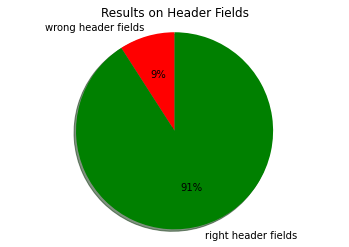

In [17]:
# Compare the predictions of header fields with ground truth
extracted_header_field_names = set([header_field_name['name'] for header_field_name 
                                    in extracted_result['extraction']['headerFields']])
ground_truth_header_field_names = set([header_field_name['name'] for header_field_name 
                                    in ground_truth['extraction']['headerFields']])
header_field_difference = len(extracted_header_field_names
                              .difference(ground_truth_header_field_names))

import matplotlib.pyplot as plt

labels = ['wrong header fields', 'right header fields']
sizes = [header_field_difference, len(extracted_header_field_names)-header_field_difference]
colors = ['r', 'g']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title('Results on Header Fields')
plt.show()

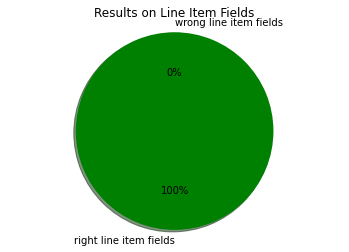

In [18]:
# Compare the predictions of line item fields with ground truth
line_items_difference = 0
for i, line_items in enumerate(extracted_result['extraction']['lineItems']):
    extracted_line_items_names = set([line_item_name['name'] for line_item_name 
                                        in line_items])
    ground_truth_line_items_names = set([line_item_name['name'] for line_item_name 
                                        in ground_truth['extraction']['lineItems'][i]])
    line_items_difference += len(extracted_line_items_names
                                 .difference(ground_truth_line_items_names))

labels = ['wrong line item fields', 'right line item fields']
sizes = [line_items_difference, len(extracted_line_items_names)-line_items_difference]
colors = ['r', 'g']

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.f%%',
        shadow=True, startangle=90, colors=colors)
ax1.axis('equal')
plt.title('Results on Line Item Fields')
plt.show()